# Assignment-1 To predict heart disease

In [15]:
#Importing necessary library and algorithms 

import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
#readind data 
df = pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Data Analysis and data preprocessing

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
# Removing nan values
cigsPerDay_mean = df["cigsPerDay"].mean()
BPMeds_mean = df["BPMeds"].mean()
BPMeds_mean = df["BPMeds"].mean()
df["cigsPerDay"] = df["cigsPerDay"].fillna(cigsPerDay_mean)
df["BPMeds"] = df["BPMeds"].fillna(BPMeds_mean)
df["totChol"] = df["totChol"].fillna(df["totChol"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())
df["glucose"] = df["glucose"].fillna(df["glucose"].mean())
df["heartRate"] = df["heartRate"].fillna(df["heartRate"].mean())
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## Data Visualization

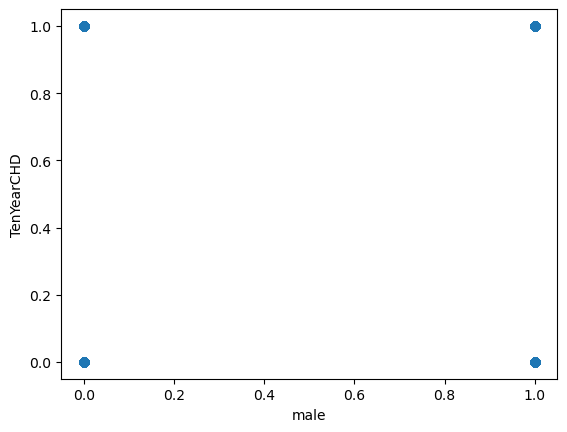

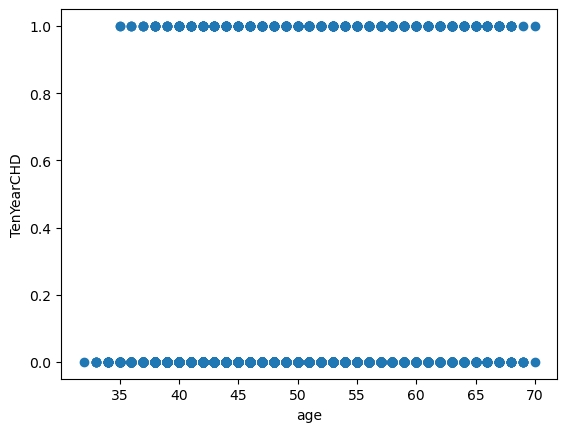

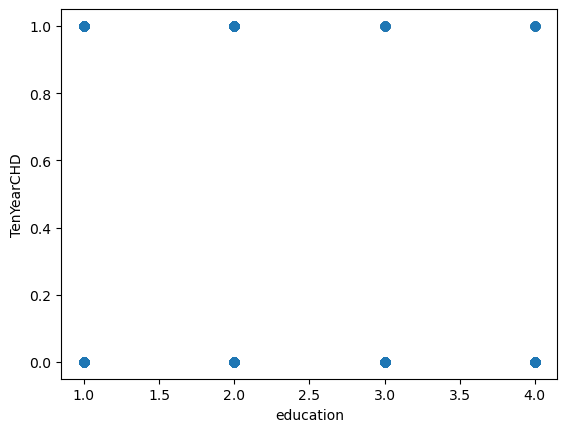

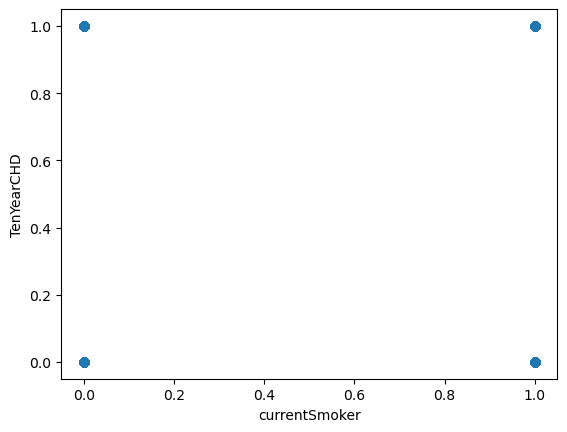

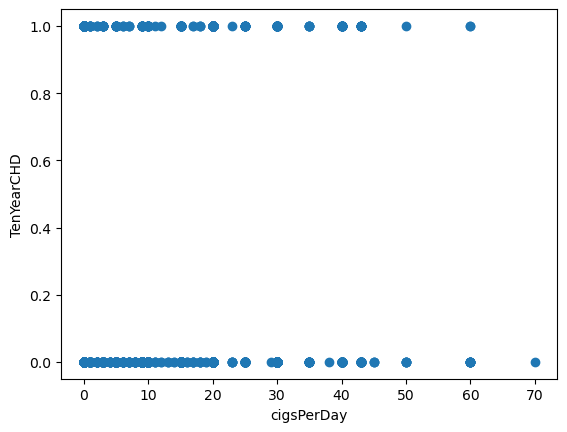

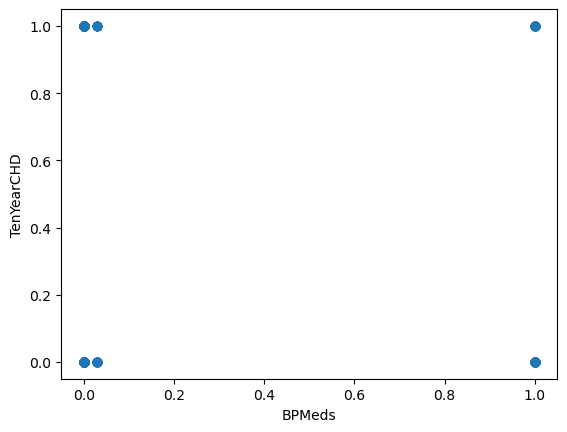

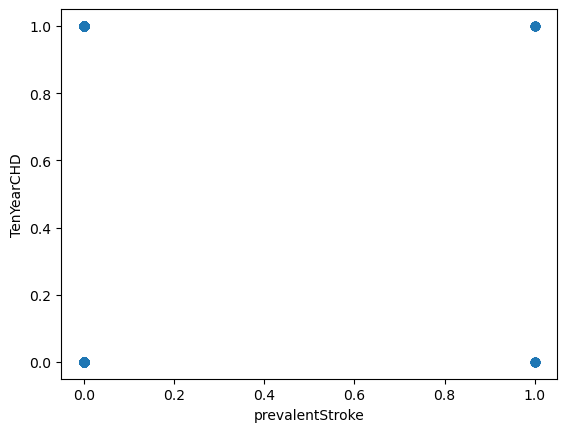

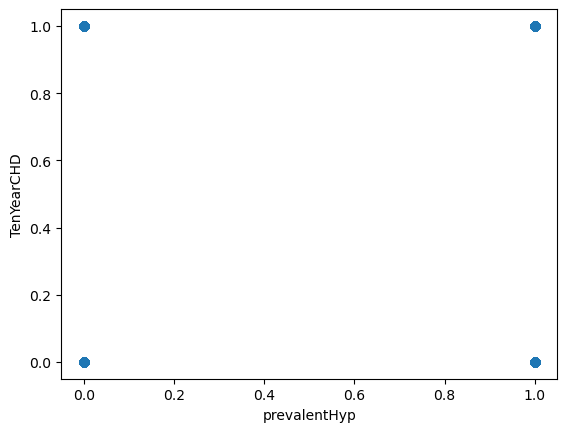

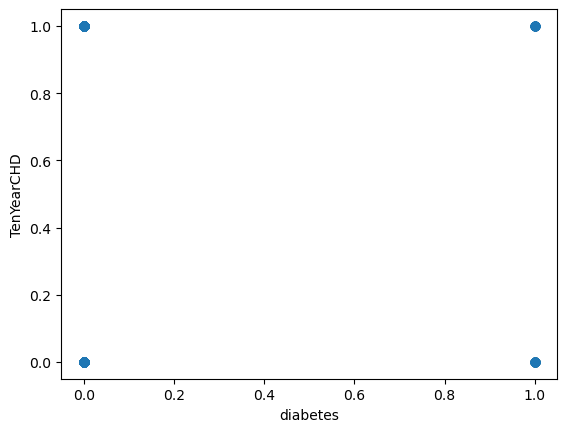

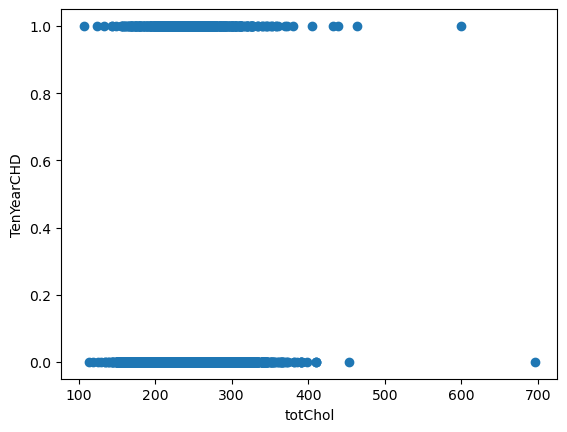

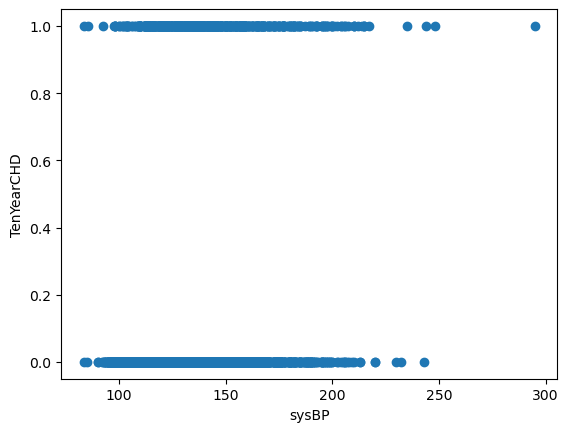

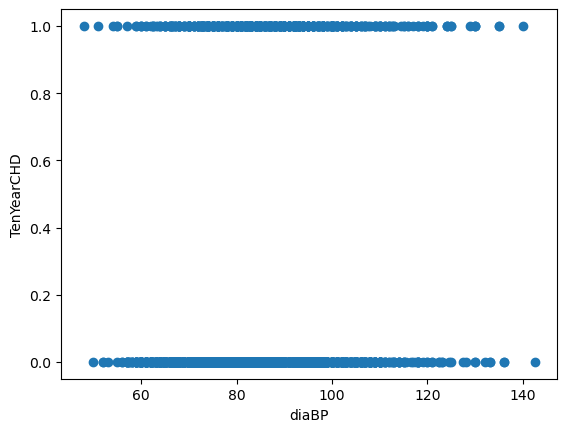

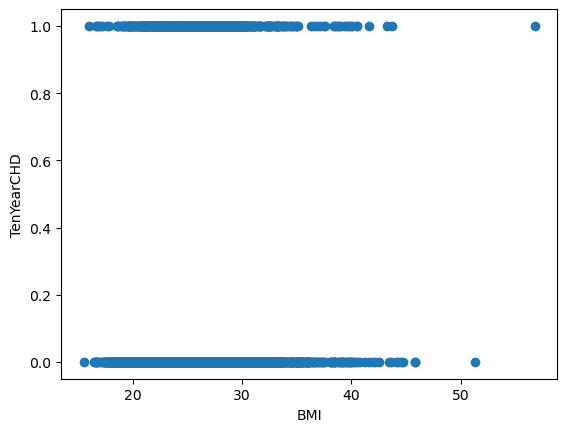

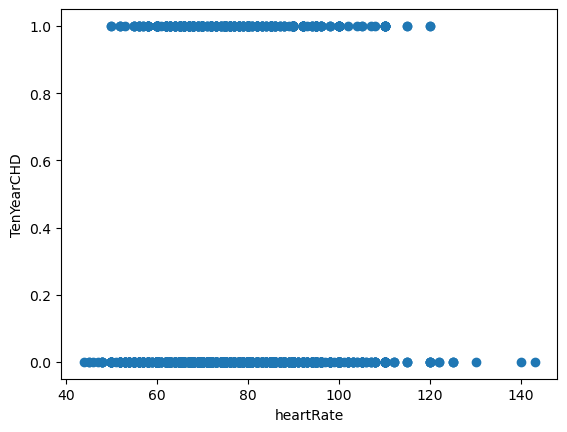

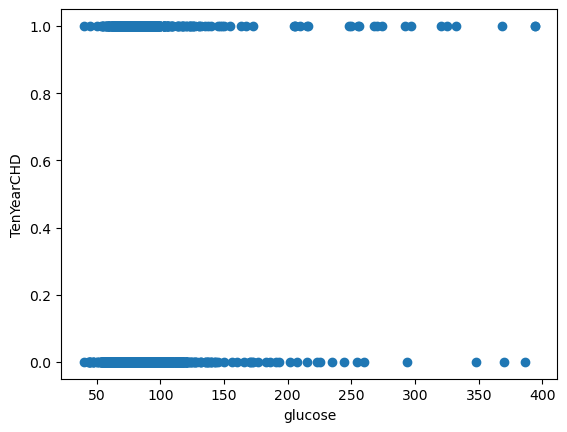

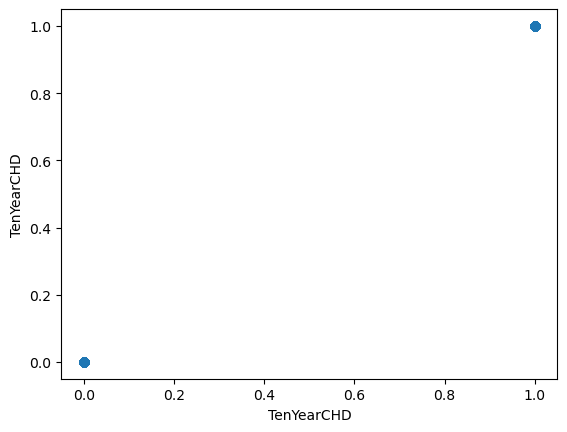

In [5]:
for x in df.columns:
    plt.xlabel(x)
    plt.ylabel("TenYearCHD")
    plt.scatter(df[x],df["TenYearCHD"])
    plt.show()

In [6]:
# selecting relevant columns
relevant_cols = df[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
relevant_cols

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,51,43.0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,48,20.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,44,15.0,210.0,126.5,87.0,19.16,86.0,81.966753


In [7]:

std = StandardScaler()
x = std.fit_transform(relevant_cols)
y = df["TenYearCHD"]

In [9]:
# Cross validation
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

# Model traning

In [10]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)
y_prd = lg_model.predict(X_test)
y_prd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Model report 

In [11]:
display(classification_report(y_test,y_prd))
display(confusion_matrix(y_test,y_prd))
lg_model.score(X_test,y_test)

'              precision    recall  f1-score   support\n\n           0       0.85      1.00      0.92       717\n           1       0.57      0.03      0.06       131\n\n    accuracy                           0.85       848\n   macro avg       0.71      0.51      0.49       848\nweighted avg       0.81      0.85      0.78       848\n'

array([[714,   3],
       [127,   4]], dtype=int64)

0.8466981132075472

In [11]:
# DecisionTreeClassifier

In [12]:

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
dc_pred = clf.predict(X_test)

In [13]:
classification_report(y_test,dc_pred)


'              precision    recall  f1-score   support\n\n           0       0.87      0.81      0.84       717\n           1       0.24      0.33      0.28       131\n\n    accuracy                           0.74       848\n   macro avg       0.56      0.57      0.56       848\nweighted avg       0.77      0.74      0.75       848\n'

# Conclusion
#### here accuracy of logistic model is better than decision tree model to predict heart disease